<a href="https://colab.research.google.com/github/archasai/ASSIGNMENT/blob/main/dataacquisiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [10]:
import pandas as pd
data=pd.read_csv('/content/covid_19.csv')
data

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
0,Saint-Helena,Africa,6115.0,2024-06-30,2024-06-30T16:15:16+00:00,2166,2.0,NaN,NaN
1,Falkland-Islands,South-America,3539.0,2024-06-30,2024-06-30T16:15:16+00:00,1930,1930.0,NaN,8632.0
2,Montserrat,North-America,4965.0,2024-06-30,2024-06-30T16:15:16+00:00,1403,1376.0,8.0,17762.0
3,Diamond-Princess,NaN,NaN,2024-06-30,2024-06-30T16:15:16+00:00,712,699.0,13.0,NaN
4,Vatican-City,Europe,799.0,2024-06-30,2024-06-30T16:15:16+00:00,29,29.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
233,Argentina,South-America,46010234.0,2024-06-30,2024-06-30T16:15:10+00:00,10128845,9997258.0,130841.0,35716069.0
234,Netherlands,Europe,17211447.0,2024-06-30,2024-06-30T16:15:10+00:00,8635786,8612599.0,22992.0,25984435.0
235,Mexico,North-America,131562772.0,2024-06-30,2024-06-30T16:15:10+00:00,7702809,6899865.0,334958.0,20013810.0
236,Iran,Asia,86022837.0,2024-06-30,2024-06-30T16:15:10+00:00,7627186,NaN,146811.0,57320267.0


In [11]:
#q1
data.size

2142

In [12]:
#q2
data.dtypes

country        object
continent      object
population    float64
day            object
time           object
Cases           int64
Recovered     float64
Deaths        float64
Tests         float64
dtype: object

In [13]:
#q3
data.isna()

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,True,False,False


In [14]:
#q4
data.nunique()

country       238
continent       7
population    229
day             1
time            7
Cases         238
Recovered     190
Deaths        218
Tests         212
dtype: int64

In [ ]:
data['Deaths'] = pd.to_numeric(data['Deaths'], errors='coerce')



In [15]:
#q5 death cases
data.Cases.mean()

8883449.365546219

In [16]:
data.Cases.median()

232042.5

In [17]:
data.Cases.std()

51930306.07751445

In [18]:
#q6
import matplotlib as plt
import seaborn as sns



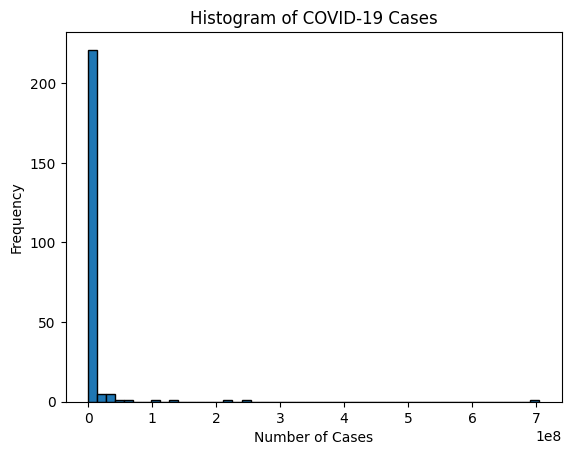

In [21]:
plt.hist(data['Cases'].dropna(), bins=50, edgecolor='black')
plt.title('Histogram of COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.show()

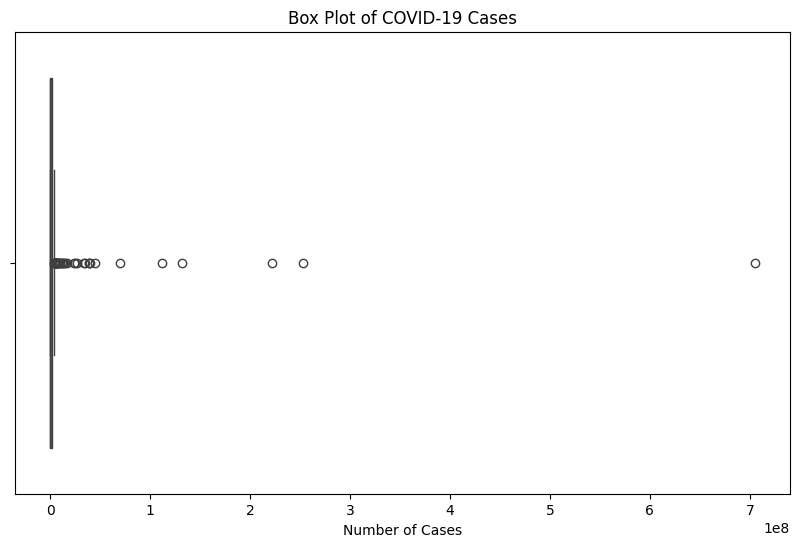

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Cases'])
plt.title('Box Plot of COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.show()

In [22]:
#q7
correlation_matrix = data[['population', 'Cases', 'Recovered', 'Deaths', 'Tests']].corr()
print(correlation_matrix)

            population     Cases  Recovered    Deaths     Tests
population    1.000000  0.367741   0.237196  0.404331  0.540603
Cases         0.367741  1.000000   0.999918  0.985558  0.837956
Recovered     0.237196  0.999918   1.000000  0.986204  0.862615
Deaths        0.404331  0.985558   0.986204  1.000000  0.801020
Tests         0.540603  0.837956   0.862615  0.801020  1.000000


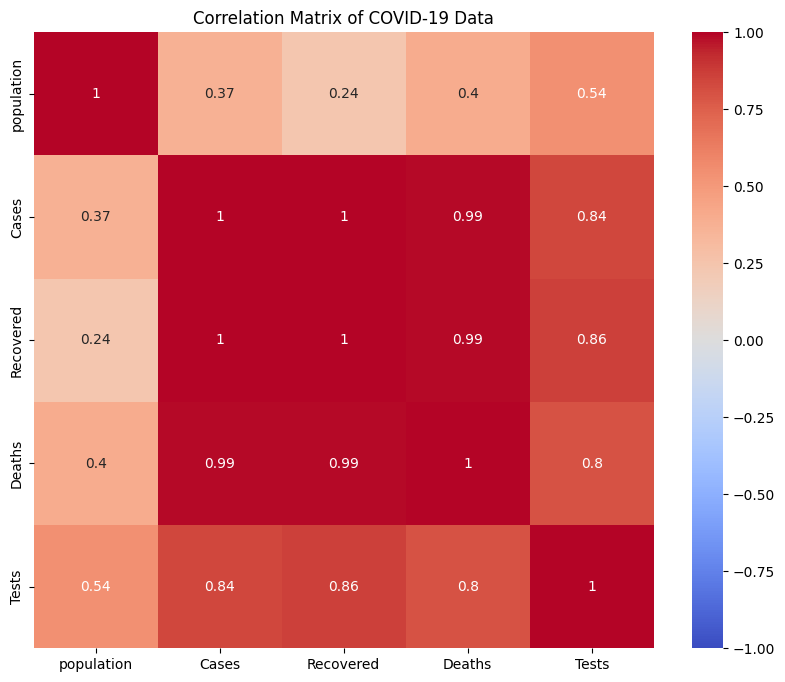

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()

from the heat map it is clear that larger populations tend to have more COVID-19 cases.There's a strong link exists between the number of cases and the number of deaths.

In [24]:
#q8
grouped_stats = data.groupby('continent')['Cases'].agg(['mean', 'sum', 'count', 'median', 'std'])
print(grouped_stats)

                       mean        sum  count       median           std
continent                                                               
Africa         4.359635e+05   25721848     59      63848.0  1.740130e+06
All            7.047539e+08  704753890      1  704753890.0           NaN
Asia           8.686285e+06  443000530     51    1003450.0  3.174437e+07
Europe         1.034311e+07  506812396     49    1509732.0  3.668209e+07
North-America  6.594457e+06  263778264     40      36375.5  2.691357e+07
Oceania        1.418645e+06   29791542     21      16950.0  4.043574e+06
South-America  9.360117e+06  140401758     15    1070188.0  1.948125e+07


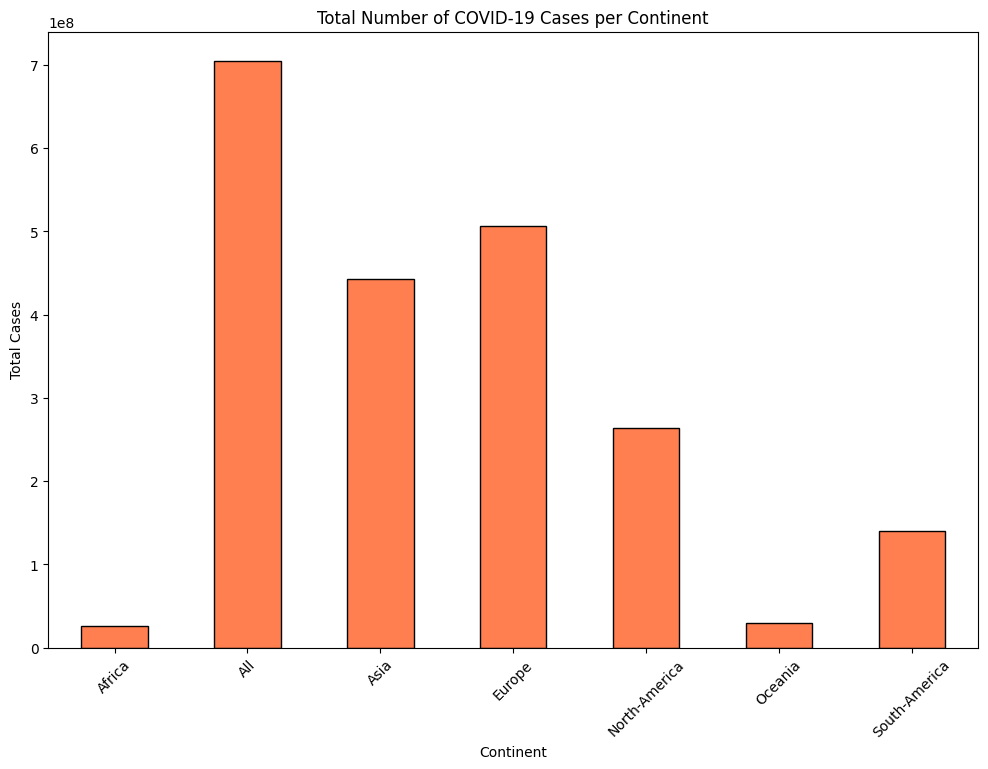

In [27]:
plt.figure(figsize=(12, 8))
grouped_stats['sum'].plot(kind='bar', color='coral', edgecolor='black')
plt.title('Total Number of COVID-19 Cases per Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#q9

North-America and Asia experienced the highest levels of COVID-19 cases and deaths, which reflects the global nature of the pandemic and its widespread effects in highly populated regions.Europe also shows high totals and variability in cases and deaths, indicating significant pandemic effects with varied responses across countries.
